<a href="https://colab.research.google.com/github/Julymusso/Trab_BD1_2021_Barbearia_Gourmet/blob/master/BD1_Relatorios_BarbeariaGourmet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conexão com postgres e Relatorios do Sistema

## Instalando bibliotecas de acesso ao postgres, manipulação de dados e gráficos

In [ ]:
#!pip install --user psycopg2-binary
#!pip install --user seaborn
#!pip install --user pandas

### Importando bibliotecas

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import psycopg2

### Usando psycopg2 para configurar conexão

In [ ]:
conn = psycopg2.connect(host="fanny.db.elephantsql.com",database="dcekjmnn",user="dcekjmnn",password="jlWxlcP-vQKVJap5lBFaN2XfqjHWpd1F")

# Relatórios

## Relatório 1
### Objetivo: Obter relatório que mostre o nome e o cargo de cada funcionário(a) e a quantidade de atendimentos realizados no mês XXX.
Código para obtenção do resultado:

In [ ]:
relatorio1 = pd.read_sql_query(""" 
SELECT pessoa.nome AS funcionário, funcionario.cargo, SUM(servico.valor) AS lucro_total FROM pessoa 
JOIN funcionario ON (pessoa.id_pessoa = funcionario.fk_pessoa_id_pessoa)
JOIN ordem_servico ON (ordem_servico.fk_pessoa_id_pessoa = pessoa.fk_endereco_id_endereco)  
JOIN funcionario_ordem_servico ON (funcionario_ordem_servico.fk_funcionario_fk_pessoa_id_pessoa = ordem_servico.fk_pessoa_id_pessoa) 
JOIN ordem_servico_servico ON (funcionario_ordem_servico.fk_funcionario_fk_pessoa_id_pessoa = ordem_servico_servico.fk_servico_id_servico) 
JOIN servico ON(servico.id_servico = ordem_servico_servico.fk_servico_id_servico) 
GROUP BY pessoa.nome, funcionario.cargo, servico.valor
ORDER BY lucro_total DESC """, conn)
relatorio1

,funcionário,cargo,lucro_total
0,Alfredo,cabeleireiro,180.0
1,Felipe,Cabeleireiro,176.0
2,Carlos,cabeleireiro,90.0
3,Raimunda,Manicure,30.0
4,Lorena,Depiladora,30.0


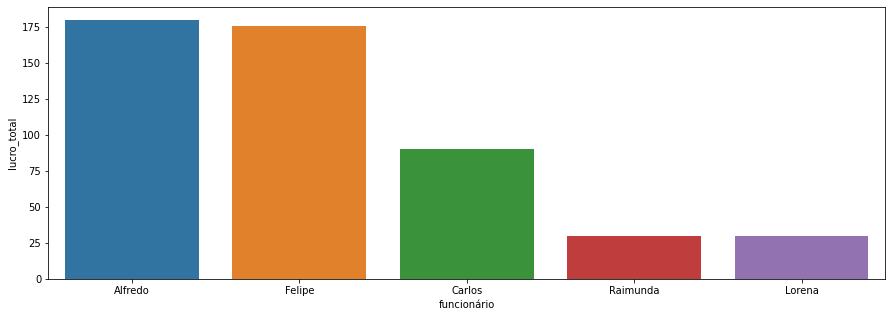

In [ ]:
plt.figure(figsize=(15,5));
sns.barplot(x='funcionário',y='lucro_total',data=relatorio1)

# ==========================================================================================
## Relatório 2
### Objetivo: Obter relatório que mostre o nome de cada serviço e a quantas vezes eles foram solicitados no mês XXX.
Código para obtenção do resultado:

In [ ]:
res = pd.read_sql_query("""select servico.tipo_servico, count(servico.tipo_servico) as servico
from servico as servico
join ordem_servico as ordem_servico
on servico.id_servico = ordem_servico.id_os
where data >= '2021-12-01'
group by servico.tipo_servico
 """, conn)
res

,tipo_servico,servico
0,Alisamento,1
1,Corte de cabelo,6
2,Depilação,2
3,Unhas dos pés,1
4,Pé e Mão,1


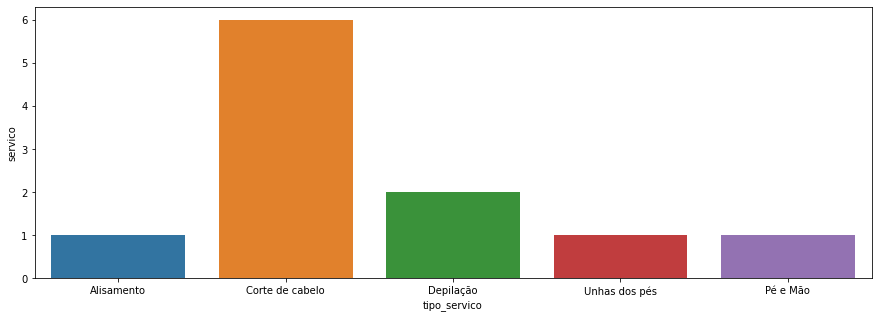

In [ ]:
plt.figure(figsize=(15,5));
sns.barplot(x='tipo_servico',y='servico',data=res,)


# ============================================================
## Relatório 3
### Objetivo: Obter relatorio que mostre o nome do funcionário, cpf, cargo e a soma do valor dos serviços realizados na empresa, ou seja, mostra o funcionário mais lucrativo.
Código para obtenção do resultado:

In [ ]:
res = pd.read_sql_query(""" SELECT pessoa.nome AS funcionario_mais_lucrativo, pessoa.cpf, funcionario.cargo, SUM(servico.valor) AS lucro_total
FROM pessoa AS pessoa 
JOIN funcionario AS funcionario ON (pessoa.id_pessoa = funcionario.fk_pessoa_id_pessoa)
JOIN ordem_servico AS ordem_servico ON (ordem_servico.fk_pessoa_id_pessoa = pessoa.fk_endereco_id_endereco)  
JOIN funcionario_ordem_servico AS funcionario_ordem_servico ON (funcionario_ordem_servico.fk_funcionario_fk_pessoa_id_pessoa = ordem_servico.fk_pessoa_id_pessoa) 
JOIN ordem_servico_servico AS ordem_servico_servico ON (funcionario_ordem_servico.fk_funcionario_fk_pessoa_id_pessoa = ordem_servico_servico.fk_servico_id_servico) 
JOIN servico AS servico ON(servico.id_servico = ordem_servico_servico.fk_servico_id_servico) 
GROUP BY pessoa.nome, pessoa.cpf, funcionario.cargo
ORDER BY lucro_total DESC """,conn)
res

,funcionario_mais_lucrativo,cpf,cargo,lucro_total
0,Alfredo,221564789-16,cabeleireiro,180.0
1,Felipe,976555189-11,Cabeleireiro,176.0
2,Carlos,199836182-12\n,cabeleireiro,90.0
3,Raimunda,177456749-98,Manicure,30.0
4,Lorena,568235631-65,Depiladora,30.0


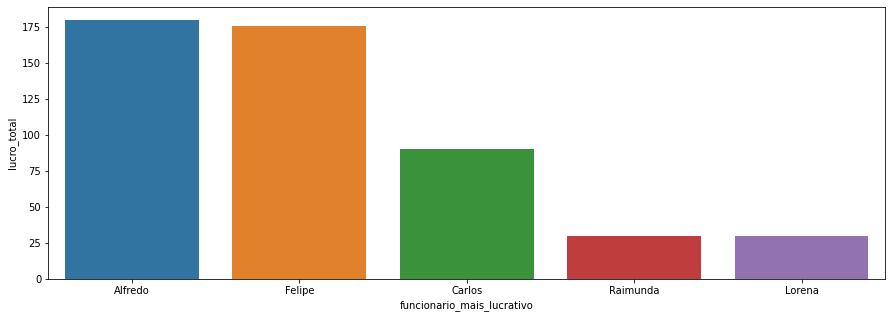

In [ ]:
plt.figure(figsize=(15,5));
sns.barplot(x='funcionario_mais_lucrativo',y='lucro_total',data=res,);

# ============================================================
## Relatório 4
### Objetivo: Obter Relatório que mostre as informações de servico mais solicitado, lucro total dos servicos e o valor total no mês.

Código para obtenção do resultado:

In [ ]:
res = pd.read_sql_query("""SELECT servico.tipo_servico AS servico_mais_solicitado, ordem_servico.data AS ordem_de_servico,
pessoa.nome AS funcionario_mais_lucrativo, SUM(servico.valor) AS lucro_total_mes, COUNT(servico.tipo_servico) AS quantidade_no_mes
FROM pessoa AS pessoa
JOIN funcionario AS funcionario ON (pessoa.id_pessoa = funcionario.fk_pessoa_id_pessoa)
JOIN ordem_servico AS ordem_servico ON (ordem_servico.fk_pessoa_id_pessoa = pessoa.fk_endereco_id_endereco)  
JOIN funcionario_ordem_servico AS funcionario_ordem_servico ON (funcionario_ordem_servico.fk_funcionario_fk_pessoa_id_pessoa = ordem_servico.fk_pessoa_id_pessoa) 
JOIN ordem_servico_servico AS ordem_servico_servico ON (funcionario_ordem_servico.fk_funcionario_fk_pessoa_id_pessoa = ordem_servico_servico.fk_servico_id_servico) 
JOIN servico AS servico ON(servico.id_servico = ordem_servico_servico.fk_servico_id_servico) 
GROUP BY servico.tipo_servico, ordem_servico.data, pessoa.nome 
ORDER BY lucro_total_mes DESC """, conn)
res

,servico_mais_solicitado,ordem_de_servico,funcionario_mais_lucrativo,lucro_total_mes,quantidade_no_mes
0,Corte de cabelo,2021-12-16,Alfredo,180.0,4
1,Corte de cabelo,2021-12-04,Felipe,176.0,4
2,Depilação,2021-12-04,Carlos,90.0,1
3,Unhas dos pés,2021-12-17,Lorena,30.0,1
4,Corte de cabelo,2021-12-04,Raimunda,30.0,1


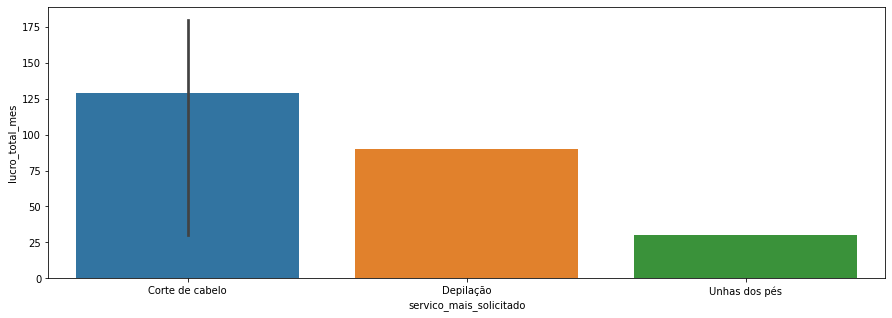

In [ ]:
plt.figure(figsize=(15,5));
sns.barplot(x = 'servico_mais_solicitado', y = 'lucro_total_mes', data=res,);

# ============================================================
## Relatório 5
### Objetivo: Qual pessoa mais gastou na barbearia e qual foi o serviço.
Código para obtenção do resultado:

In [ ]:
res = pd.read_sql_query(""" SELECT pessoa.nome, pessoa.sobrenome, pessoa.cpf
FROM pessoa AS pessoa
JOIN funcionario AS funcionario ON (pessoa.id_pessoa = funcionario.fk_pessoa_id_pessoa)
JOIN ordem_servico AS ordem_servico ON (ordem_servico.fk_pessoa_id_pessoa = pessoa.fk_endereco_id_endereco)
JOIN funcionario_ordem_servico AS funcionario_ordem_servico ON (funcionario_ordem_servico.fk_funcionario_fk_pessoa_id_pessoa = ordem_servico.fk_pessoa_id_pessoa)
JOIN ordem_servico_servico AS ordem_servico_servico ON (funcionario_ordem_servico.fk_funcionario_fk_pessoa_id_pessoa = ordem_servico_servico.fk_servico_id_servico) 
JOIN servico AS servico ON(servico.id_servico = ordem_servico_servico.fk_servico_id_servico)
GROUP BY pessoa.nome, pessoa.sobrenome, pessoa.cpf             
""", conn)
res

,nome,sobrenome,cpf
0,Felipe,Trindade,976555189-11
1,Carlos,Medeiros,199836182-12\n
2,Raimunda,Nonato,177456749-98
3,Alfredo,Volpani,221564789-16
4,Lorena,Silva,568235631-65


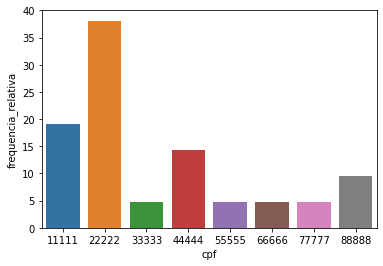

In [ ]:
sns.barplot(x='cpf',y='frequencia_relativa', data=res)